## 3c. More ways to plot

### Table of contents

- Pandas
  - Plotting Shortcuts
  - Table Styling


- Other Packages
  - Venn Diagrams
  - Joyplots
  - Network Graphs
  - More Types

---

In [21]:
import pandas as pd  # we'll use pandas to read and manipulate datasets
import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
# display figures alongside cell output
%matplotlib inline

import matplotlib

**ℹ️ Tip**: it's not by mistake that the following cell is separate from the previous. There is a small bug that causes it not to be executed correctly if they are ran at the same time. This is not limited to Jupyter notebooks.

In [3]:
matplotlib.rcParams['figure.dpi'] = 100  # make figures large
%config InlineBackend.figure_format = 'retina'  # make figures crisp

## Pandas

The average daily temperature from Jan 2018 to Jan 2019, as reported by AccuWeather:

In [4]:
weather = pd.read_csv('example_files/weather.csv')
weather.head()

,month,day,Los Angeles,New York City
0,1,1,48,33
1,1,2,50,39
2,1,3,52,38
3,1,4,56,49
4,1,5,66,35


In [5]:
month_names = 'January February March April May June July August September Octomber November December'.split()
cities = ['New York City', 'Los Angeles']

### Plotting Shortcuts

Pandas DataFrames integrates directly with Matplotlib, providing convenient plotting shortcuts:

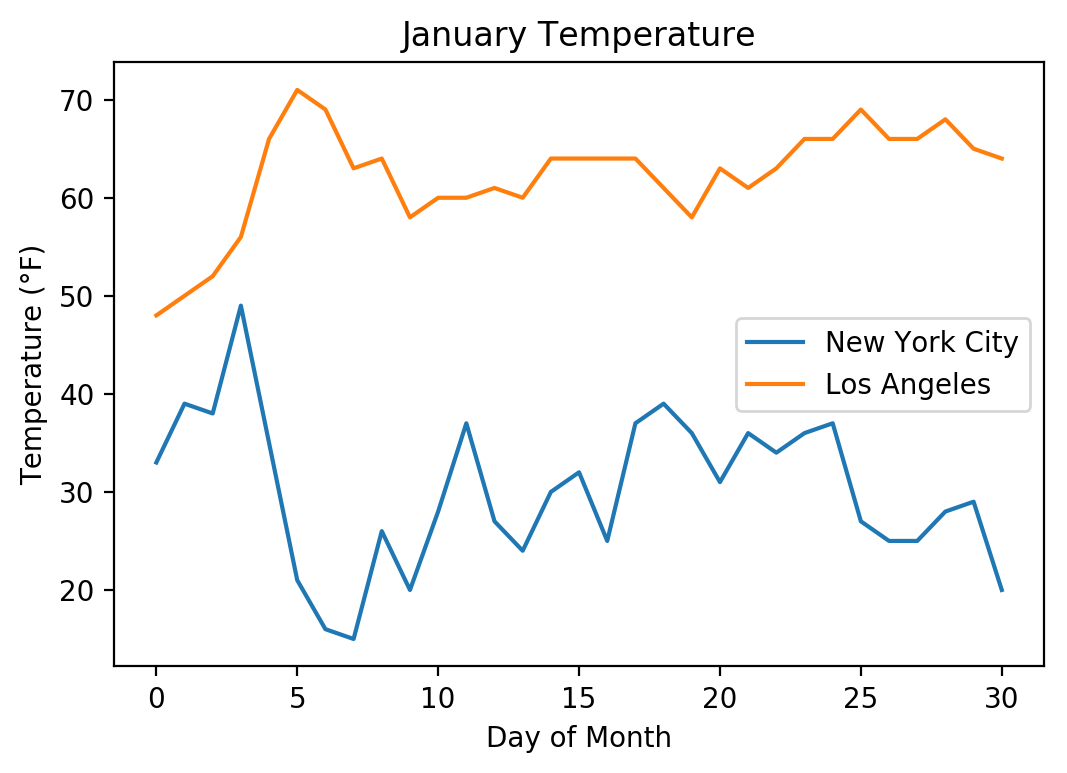

In [6]:
weather[weather.month == 1][cities].plot()

# continue customizing the chart
plt.title('January Temperature')
plt.xlabel('Day of Month')
plt.ylabel('Temperature (°F)');

They make labeling, grouping and other tedious tasks easier:

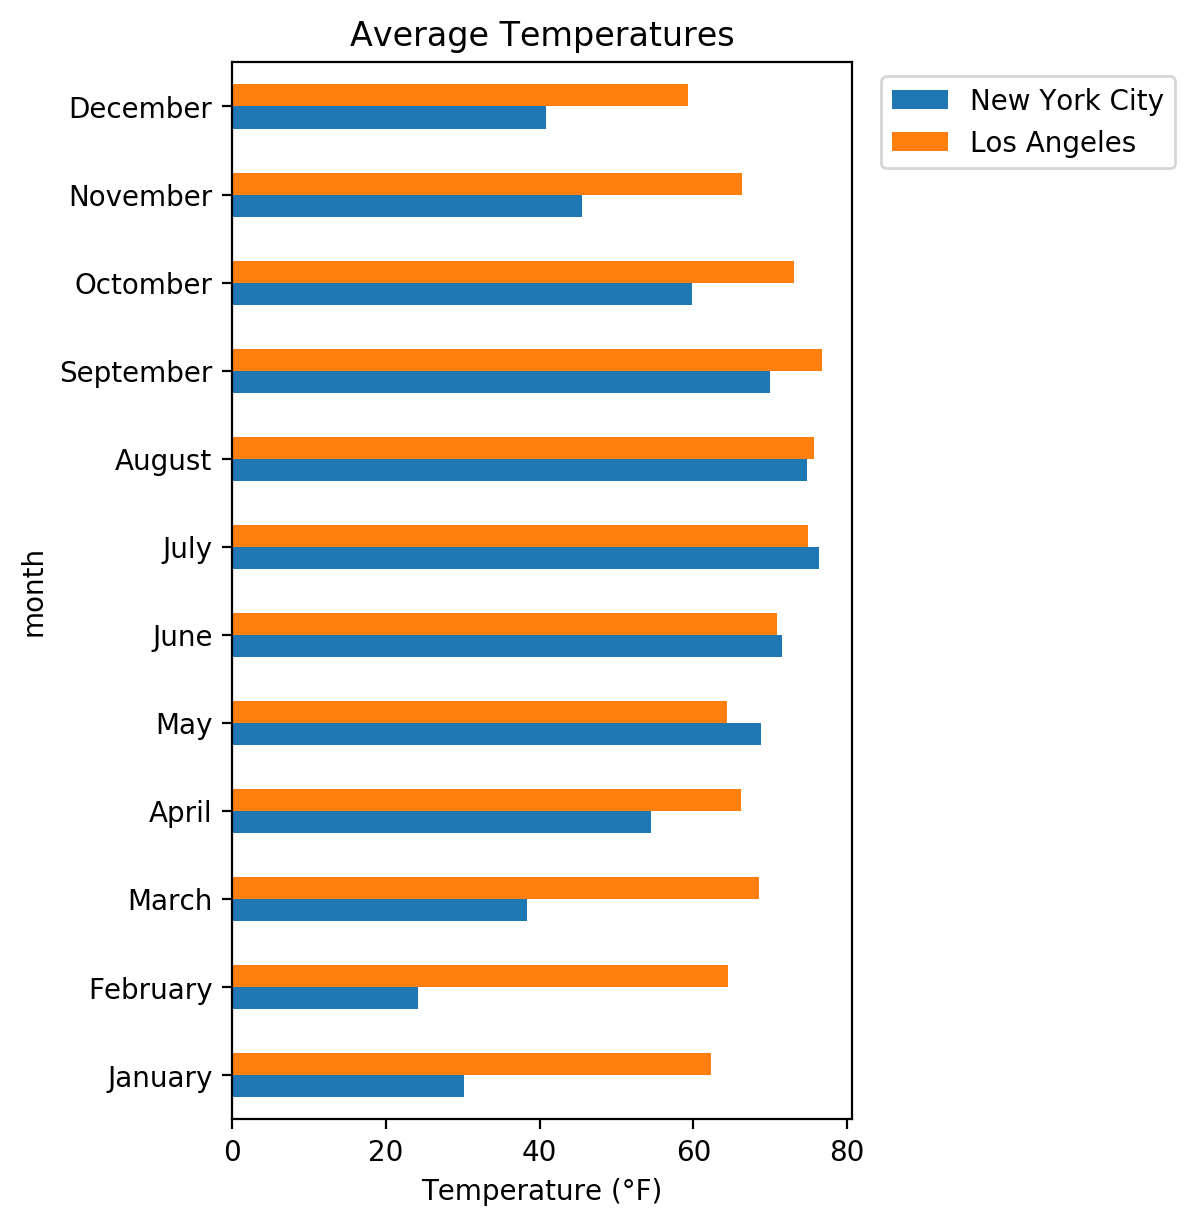

In [7]:
weather.groupby('month')[cities].mean().plot(
    kind='barh',  # horizontal bar chart
    figsize=(4, 7),
    title='Average Temperatures',
)

plt.gca().set_yticklabels(month_names)
plt.gca().legend(bbox_to_anchor=(1.025, 1))
plt.xlabel('Temperature (°F)');

Most non-specialty chart types are supported:

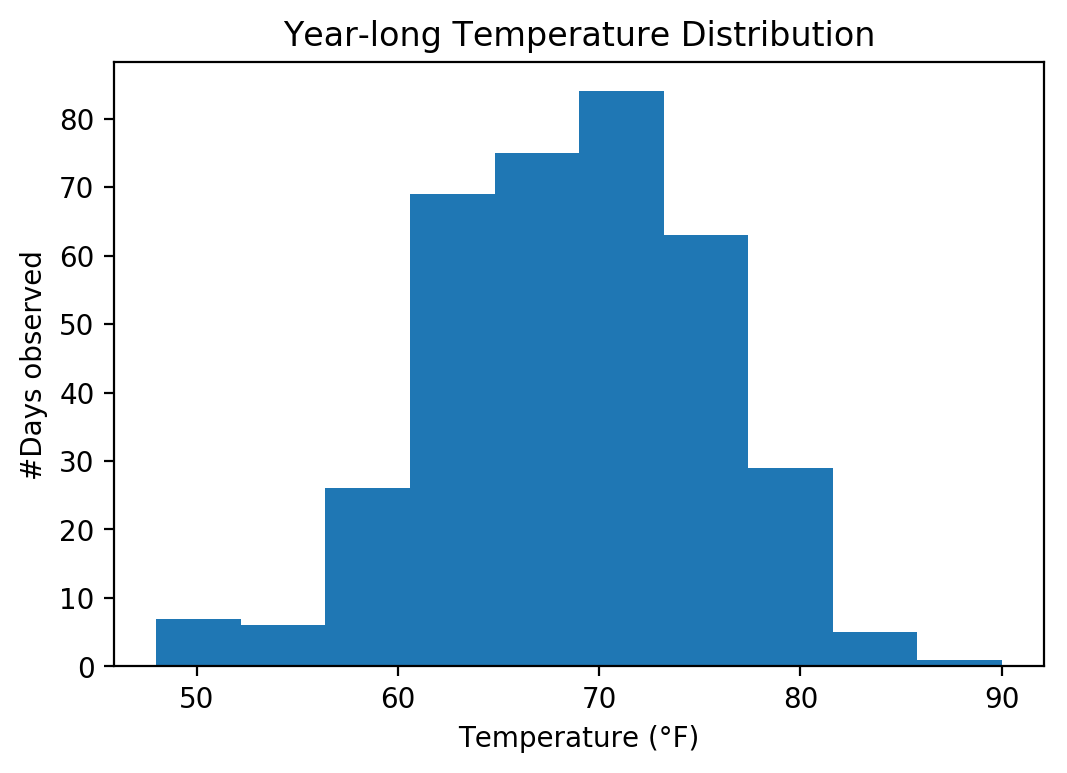

In [8]:
weather['Los Angeles'].plot(kind='hist')

plt.title('Year-long Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('#Days observed');

**ℹ️ Tip**: [read more](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) about supported chart types and options

### Table Styling

Lightweight visualizations can also be incorporated directly inside tables

In [11]:
df = pd.DataFrame(np.random.randn(7, 3), columns=list('ABC'))
df.iloc[1, 1] = np.nan

df

,A,B,C
0,0.489204,0.729618,0.820870
1,-0.628325,NaN,1.394093
2,0.344456,-0.719020,-0.596424
3,-1.202312,-1.643076,-1.846353
4,0.023225,-0.231905,-0.067462
5,-1.651274,-1.039817,-0.962123
6,0.569543,0.766586,-1.877524


Set a caption for your table:

In [12]:
df.style.set_caption('Example Data')

,A,B,C
0,0.489204,0.729618,0.82087
1,-0.628325,nan,1.39409
2,0.344456,-0.71902,-0.596424
3,-1.20231,-1.64308,-1.84635
4,0.0232245,-0.231905,-0.0674619
5,-1.65127,-1.03982,-0.962123
6,0.569543,0.766586,-1.87752


Modify the precision:

In [13]:
df.round(3)

,A,B,C
0,0.489,0.730,0.821
1,-0.628,NaN,1.394
2,0.344,-0.719,-0.596
3,-1.202,-1.643,-1.846
4,0.023,-0.232,-0.067
5,-1.651,-1.040,-0.962
6,0.570,0.767,-1.878


Set global options:

In [14]:
pd.set_option('precision', 2)

**ℹ️ Tip**: [read more](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) about Pandas options

---

Change the style of specific elements:

In [15]:
df.style.highlight_null()

,A,B,C
0,0.49,0.73,0.82
1,-0.63,nan,1.4
2,0.34,-0.72,-0.6
3,-1.2,-1.6,-1.8
4,0.023,-0.23,-0.067
5,-1.7,-1,-0.96
6,0.57,0.77,-1.9


Restrict to only a subset of rows/columns:

In [16]:
df.style.highlight_max(subset=['A', 'B'], axis=0)

,A,B,C
0,0.49,0.73,0.82
1,-0.63,nan,1.4
2,0.34,-0.72,-0.6
3,-1.2,-1.6,-1.8
4,0.023,-0.23,-0.067
5,-1.7,-1,-0.96
6,0.57,0.77,-1.9


Arbitrary functions and function chaining:

In [17]:
def highlight_negatives(val):
    """ Make negative values bold red """
    color = 'red' if val < 0 else 'black'
    weight = 'bold' if val < 0 else 'normal'
    return f'color: {color}; font-weight: {weight}'  # css syntax

In [18]:
df.style\
    .set_precision(3)\
    .applymap(highlight_negatives)

,A,B,C
0,0.489,0.73,0.821
1,-0.628,nan,1.39
2,0.344,-0.719,-0.596
3,-1.2,-1.64,-1.85
4,0.0232,-0.232,-0.0675
5,-1.65,-1.04,-0.962
6,0.57,0.767,-1.88


---

Even inline charts:

In [19]:
df.style.bar(subset='C')

,A,B,C
0,0.49,0.73,0.82
1,-0.63,nan,1.4
2,0.34,-0.72,-0.6
3,-1.2,-1.6,-1.8
4,0.023,-0.23,-0.067
5,-1.7,-1,-0.96
6,0.57,0.77,-1.9


In [22]:
df.style.background_gradient(cmap='Greens')

,A,B,C
0,0.49,0.73,0.82
1,-0.63,nan,1.4
2,0.34,-0.72,-0.6
3,-1.2,-1.6,-1.8
4,0.023,-0.23,-0.067
5,-1.7,-1,-0.96
6,0.57,0.77,-1.9


**ℹ️ Tip**: read more about [table styling](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

**ℹ️ Tip**: watch a [short animation](http://i.imgur.com/ZY8dKpA.gif) on (slightly overdone) table styling

## Other Packages

While Matplotlib is the most widely used library (seconded by Seaborn), there are many other ones, most with overlapping functionality (line, bar charts etc). But there are also those that offer specific kinds of visualizations

### Venn Diagrams

Show logical relations between a finite collection of sets:

In [23]:
from matplotlib_venn import venn2

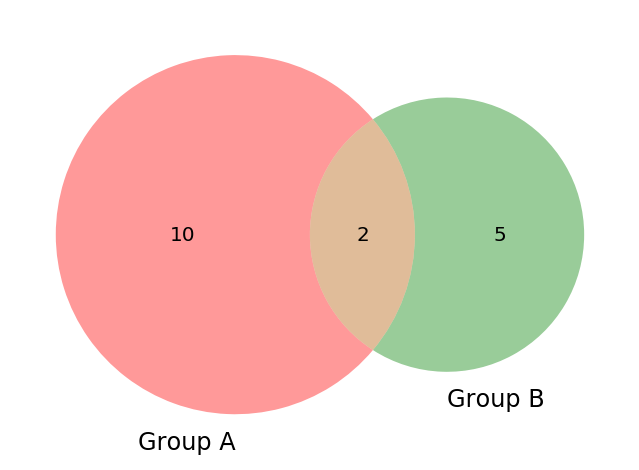

In [24]:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'));

### Joyplots

Joyplots show distributions over an ordinal variable or discretized time:

In [25]:
from joypy import joyplot

**👾 Trivia**: they got their name from Joy Division's [album](https://itunes.apple.com/us/album/unknown-pleasures-remastered/544363171) that used such a plot on as their cover. Otherwise known as a ridgeplot. More recently popularized by Tensorflow's display of weights distributions over time.

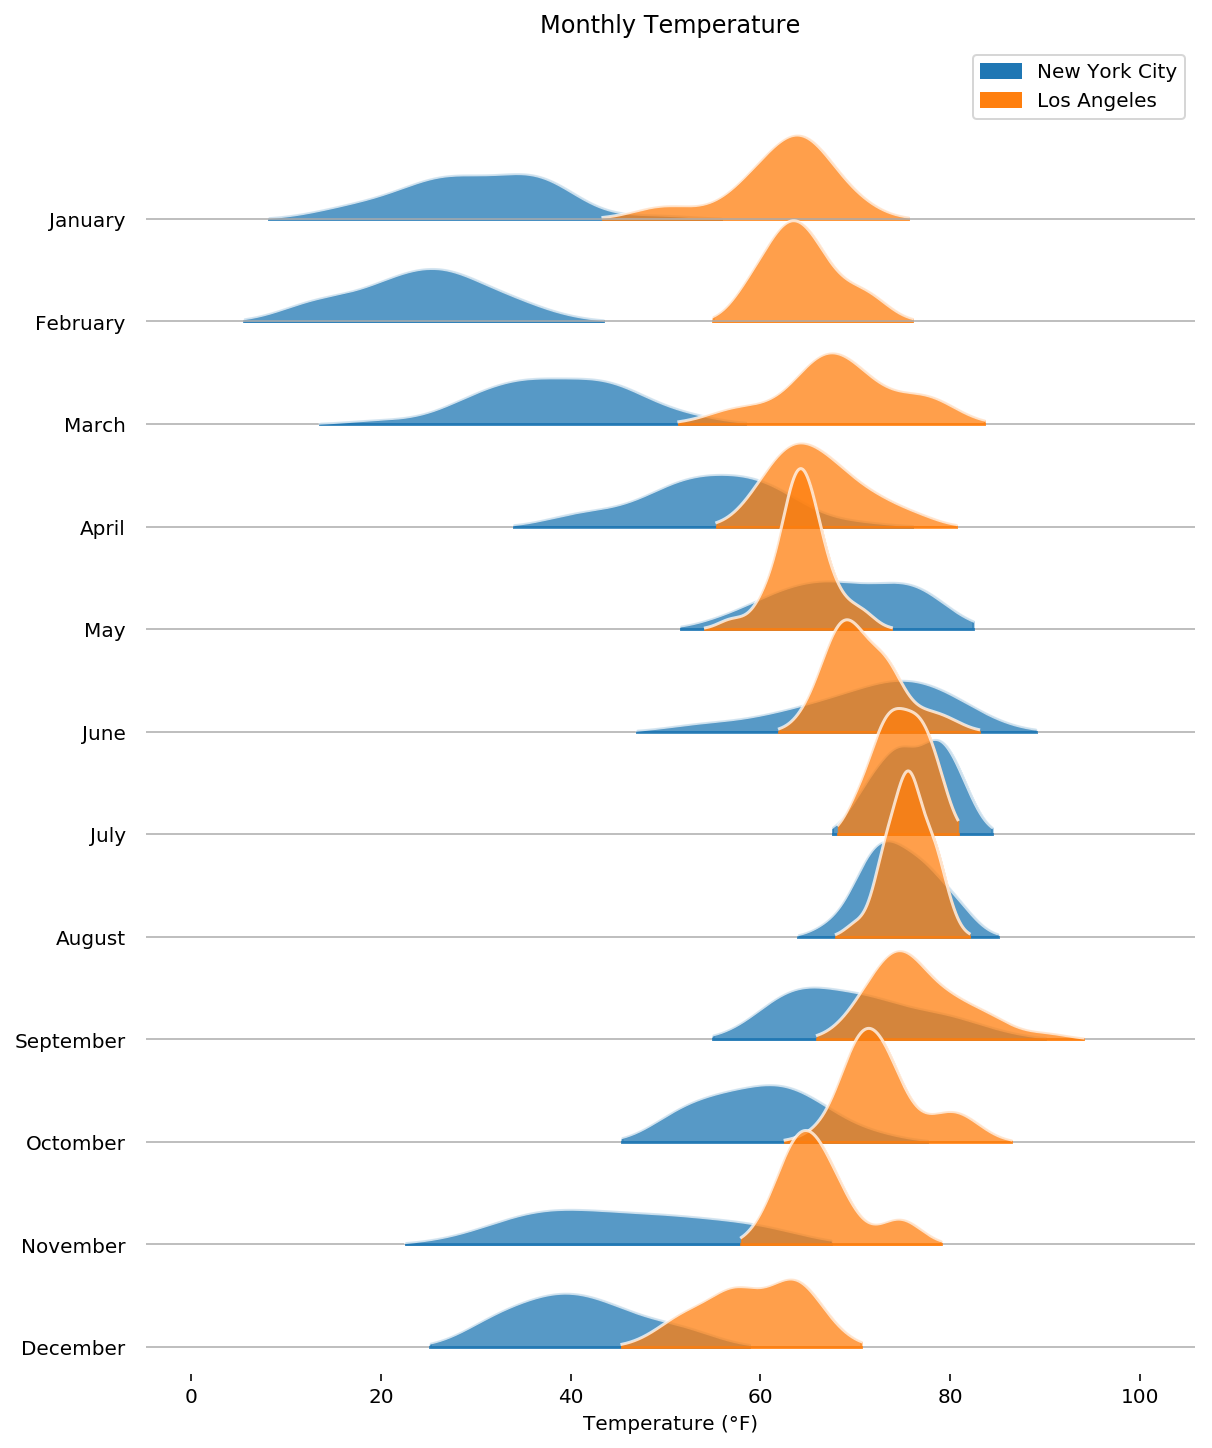

In [28]:
fig, axes = joyplot(
    weather, by='month', column=['New York City', 'Los Angeles'],
    alpha=.75, range_style='own', grid='y', linecolor='white', 
    figsize=(8, 10), title='Monthly Temperature', legend=True,
)

axes[-1].set_xlabel('Temperature (°F)')
for month, ax in zip(month_names, axes):
    ax.set_yticklabels([month])

### Network Graphs

NetworkX is the de-facto library for storing graphs

In [29]:
import networkx as nx

Provides simple plotting:

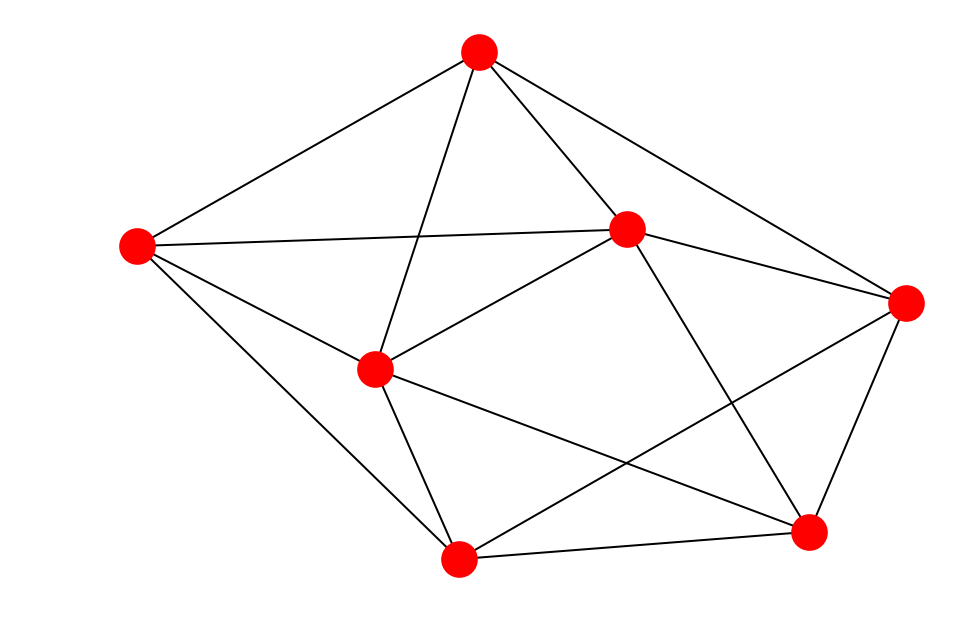

In [30]:
G = nx.gnm_random_graph(7, 15)
nx.draw(G)

But also complex customizations:

In [31]:
%%time
import requests
# source: http://evelinag.com/blog/2015/12-15-star-wars-social-network/index.html#.XG0a7KeZPRZ
r = requests.get('https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/networks/starwars-episode-1-interactions-allCharacters.json')
d = r.json()

CPU times: user 102 ms, sys: 10.2 ms, total: 113 ms
Wall time: 429 ms


In [32]:
G = nx.Graph()
G.add_nodes_from((n['value'], n) 
                 for n in d['nodes'])
G.add_weighted_edges_from([(n['source'], n['target'], n['value']) 
                           for n in d['links'] 
                           if n['source'] in G.nodes and n['target'] in G.nodes])

In [33]:
# data from Wookieepedia
G.add_nodes_from([
    (33, {'affiliation': 'Republic', 'species': 'mechanical'}),  # r2-d2
    (6 , {'affiliation': 'Republic', 'species': 'mechanical'}),  # bravo 2
    (4 , {'affiliation': 'Republic', 'species': 'mechanical'}),  # bravo 3
    (31, {'affiliation': 'Republic', 'species': 'human'}),  # padme
    (7 , {'affiliation': 'Republic', 'species': 'non-human'}),  # yoda    
    
    (19, {'affiliation': 'Empire', 'species': 'human'}),  # nute
    (3 , {'affiliation': 'Empire', 'species': 'human'}),  # organa
    (14, {'affiliation': 'Empire', 'species': 'human'}),  # emperor
    (5 , {'affiliation': 'Empire', 'species': 'human'}),  # ceel

    (11, {'affiliation': 'Neutral', 'species': 'human'}),  # shmi
    (12, {'affiliation': 'Neutral', 'species': 'human'}),  # fode
    (8 , {'affiliation': 'Neutral', 'species': 'non-human'}),  # watto
])

In [34]:
G.remove_nodes_from([node for node, val in nx.get_node_attributes(G, 'value').items() if val == 0])
G.remove_nodes_from([node for node, deg in G.degree if deg == 0])

In [35]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 13
Average degree:   2.1667


In [36]:
species2shape = {
    'mechanical': 's',  # square
    'human':      'o',  # circle
    'non-human':  '^',  # triangle
}

In [37]:
affiliation2color = {
    'Republic': 'C0',  # blue
    'Empire':   'C3',  # red
    'Neutral':  'C1',  # orange
}

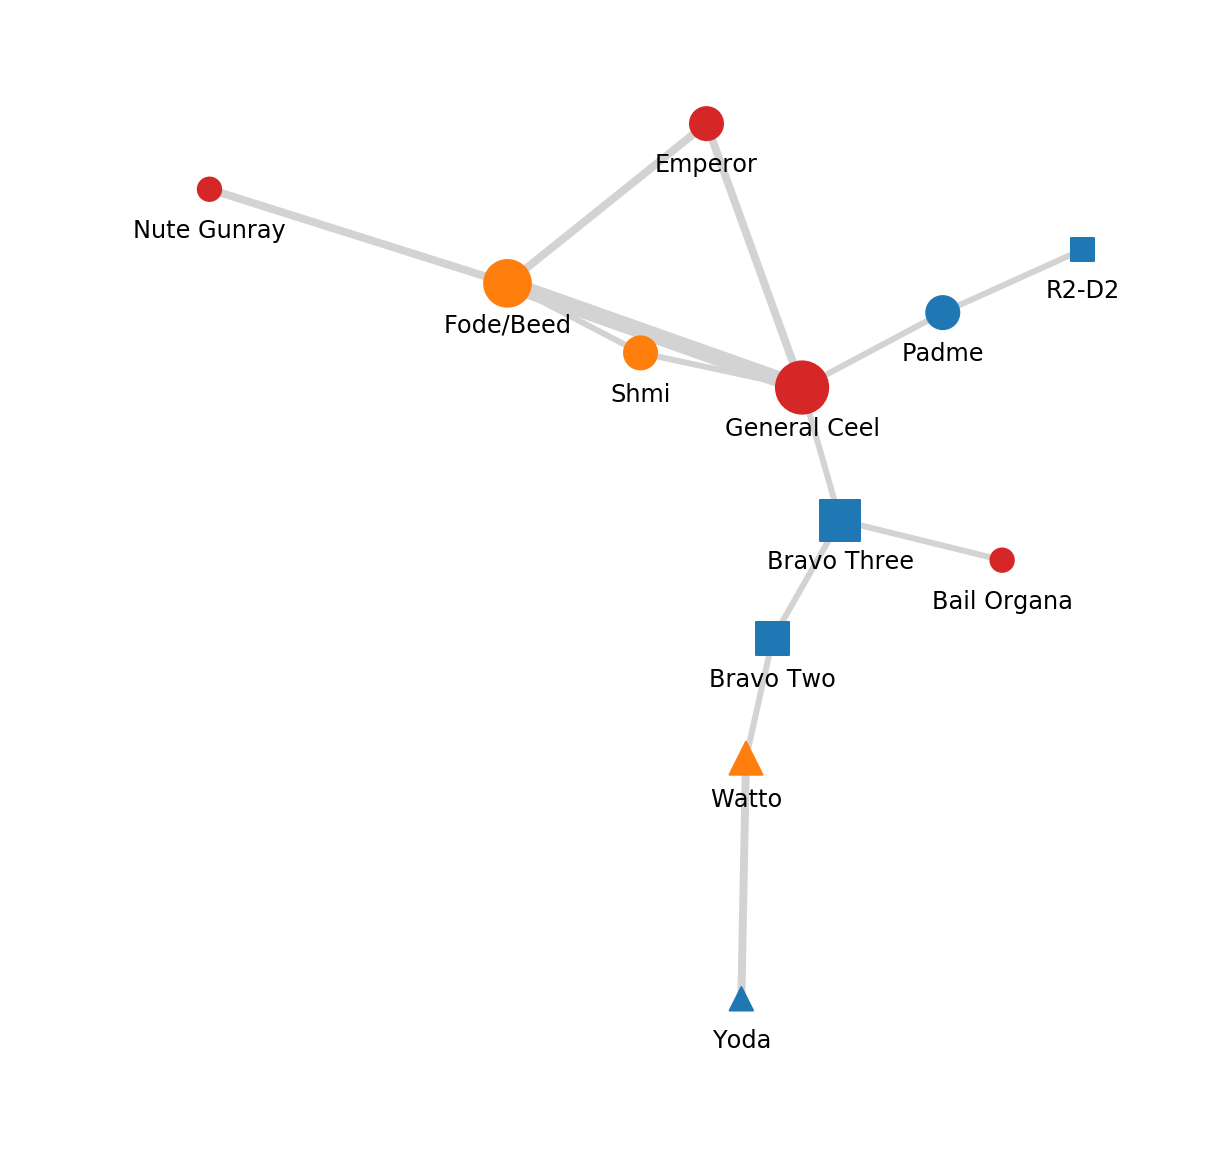

In [40]:
plt.figure(figsize=(10, 10))
pos = nx.kamada_kawai_layout(G)

""" Draw nodes """
for species, shape in species2shape.items():
    species_nodes = [node 
                     for node, s in nx.get_node_attributes(G, 'species').items() 
                     if s == species]
    node_sizes    = [c 
                     for n, c in nx.degree_centrality(G).items() 
                     if n in species_nodes]
    node_colors   = [affiliation2color[aff] 
                     for n, aff in nx.get_node_attributes(G, 'affiliation').items() 
                     if n in species_nodes]
    nx.draw_networkx_nodes(
        G, 
        pos=pos,
        nodelist=species_nodes,  # list nodes to plot
        node_size=np.array(node_sizes) * 1500,  # list size of each node, in order
        node_color=node_colors,  # list color of each node, in order
        node_shape=shape,  # a single shape for all nodes (which is why this loop is needed)
    )


""" Draw labels"""
label_pos  = {node: coords + [0, -.075]  # a bit lower than the coordinates of the node
              for node, coords in pos.items()}
label_text = {node: name.title() 
              for node, name in nx.get_node_attributes(G, 'name').items()}
nx.draw_networkx_labels(
    G, 
    pos=label_pos,  # the position of each node, as a dictionary
    labels=label_text,  # the text of each node, as a dictionary
)


""" Draw edges """
edge_widths = list(nx.get_edge_attributes(G, 'weight').values())
nx.draw_networkx_edges(
    G, 
    pos=pos,
    width=np.array(edge_widths) ** .4 * 3,  # raise to subunitary power to atenuate the large differences
    edge_color='lightgray',
)


""" Figure settings """
# expand limits
plt.ylim(plt.ylim()[0] - .1, plt.ylim()[1] + .1)
plt.xlim(plt.xlim()[0] - .1, plt.xlim()[1] + .1)

# hide axes
plt.axis('off');

**ℹ️ Tip**: learn more about NetworkX from the [official tutorial](https://networkx.github.io/documentation/stable/tutorial.html)

### More Types

The largest areas we haven't touched upon are interactive charts and map charts.  While this workshop focused on static charts, we can take advantage of the Jupyter environment and plot these as well. 

 - more chart types: 
    - [3D scatterplot](https://plot.ly/python/3d-network-graph/) (navigatable)
    - [sankey](https://plot.ly/python/parallel-categories-diagram/)
    - [choropleth](https://plot.ly/python/maps/)
    - [chord diagram](https://plot.ly/python/filled-chord-diagram/)
    - [treemap](https://plot.ly/python/treemaps/)
    - [wind rose](https://plot.ly/python/wind-rose-charts/)